# HRDPS Data

This demonstrates using data from Canada's High Resolution Deterministic Prediction System (HRDPS).

[HRDPS Model Description](https://eccc-msc.github.io/open-data/msc-data/nwp_hrdps/readme_hrdps-datamart_en/#data-location)

Data is available for 24 hours.

The organization of these files is different than many other products. 
- There are no index files provided.
- Each GRIB2 file only contains one message. The variable name and level is in the file's name. So, Herbie will require you provide a keyword argument for both `variable` and `level`.

In [1]:
from herbie import Herbie
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from toolbox import EasyMap, pc
import cartopy.crs as ccrs
import cartopy.feature as feature
import pandas as pd

recent = pd.Timestamp("now").floor("6H") - pd.Timedelta("6H")

In [ ]:
# If you don't provide input for 'variable' or 'level',
# Herbie will give you some ideas

H = Herbie(
    recent,
    model="hrdps",
    fxx=0,
)


HRDPS requires an argument for 'variable'. Here are some ideas:
{'UTCI', 'LAND', 'TCDC', 'ULWRF', 'WIND', 'WDIR', 'DEPR', 'GUST-Min', 'PRES', 'SPFH', 'GUST', 'SDWE', 'UGRD', 'SOILW', 'DPT', 'HPBL', 'WTMP', 'SKINT', 'DLWRF', 'ALBDO', 'PRMSL', 'HGT', 'HLCY', 'NLWRS', 'CAPE', 'DEN', 'LHTFL', 'SHTFL', 'GUST-Max', 'SOILVIC', 'USWRF', 'ICEC', 'RH', 'CWAT', 'SDEN', 'SFCWRO', 'NSWRS', 'VGRD', 'DSWRF', 'TSOIL', 'SNOD', 'TMP'}.
For full list of files, see https://dd.weather.gc.ca/model_hrdps/continental/
HRDPS requires an argument for 'level'. Here are some ideas:
{'ISBL_0970', 'NTAT', 'EATM', 'ISBL_0450', 'Sfc', 'ISBL_0400', 'DBS-0-1cm', 'ISBL_0800', 'AGL-80m', 'ISBL_1000', 'AGL-2m', 'ISBL_0500', 'ISBL_0850', 'ISBL_0650', 'ISBL_0175', 'ISBL_0225', 'ISBL_0985', 'ISBL_0250', 'ISBL_0150', 'ISBL_0200', 'ISBL_0275', 'ISBY-1000-500', 'AGL-40m', 'ISBL_1015', 'ISBL_0875', 'AGL-120m', 'ISBL_0050', 'DBS-0-10cm', 'ISBL_0300', 'ISBL_0600', 'ISBL_0550', 'ISBL_0750', 'ISBL_0925', 'ISBL_0950', 'ISBL_0350', 'I

AttributeError: 'Herbie' object has no attribute 'variable'

Get the 2-metre temperature

In [4]:
H = Herbie(
    recent,
    model="hrdps",
    fxx=0,
    product="continental/2.5km",
    variable="TMP",
    level="AGL-2m",
)
ds = H.xarray()
ds

✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Jul-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1055: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset>
Dimensions:              (y: 1290, x: 2540)
Coordinates:
    time                 datetime64[ns] 2023-07-01T06:00:00
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps
    product:                 continental/2.5km
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps/20230701/20230701T06Z_...
    local_grib:              /home/blaylock/data/hrdps/20230701/20230701T06Z_...
    searchString:            None

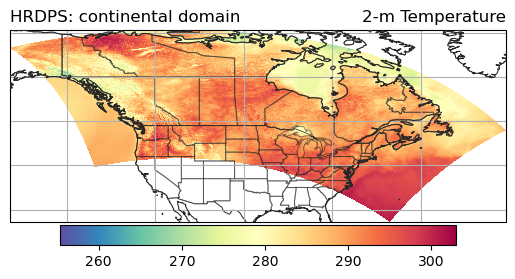

In [5]:
ax = EasyMap("50m").BORDERS().STATES(alpha=0.5).ax
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc, cmap="Spectral_r")
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8)
ax.set_title("2-m Temperature", loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")
ax.gridlines()

Get 10-m U and V wind

In [6]:
# loading more than one variable requires a loop, because the
# data is stored in multiple files (and a Herbie object only
# represents a single file).

store = []
for var, lev in zip(["UGRD", "VGRD"], ["AGL-10m", "AGL-10m"]):
    _ds = Herbie(
        recent,
        model="hrdps",
        fxx=0,
        product="continental/2.5km",
        variable=var,
        level=lev,
    ).xarray()
    store.append(_ds)

ds = xr.merge(store)
ds


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Jul-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1055: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Jul-01 06:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1055: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset>
Dimensions:              (y: 1290, x: 2540)
Coordinates:
    time                 datetime64[ns] 2023-07-01T06:00:00
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
    latitude             (y, x) float64 39.63 39.63 39.64 ... 47.91 47.89 47.88
    longitude            (y, x) float64 -133.6 -133.6 -133.6 ... -40.73 -40.71
    valid_time           datetime64[ns] 2023-07-01T06:00:00
Dimensions without coordinates: y, x
Data variables:
    u10                  (y, x) float32 ...
    gribfile_projection  object None
    v10                  (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps
    product:                 continental/2.5km
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps/20230701/20230701T06Z_...
    local_grib:              /home/blaylock/data/hrdps/20230701/20230701T06Z_...
    searchString:            None

We want to plot this data on the same map projection as itself, but Metpy doesn't recognize the 'rotated_latitude_longitude'
projection type. (see <https://github.com/Unidata/MetPy/issues/3099>)

In [7]:
# Metpy doesn't recognize the 'rotated_latitude_longitude'
# projection type. (see https://github.com/Unidata/MetPy/issues/3099)
ds.herbie.crs


ValueError: Unhandled projection: rotated_latitude_longitude

In [9]:
# But we can get the info we need
ds.gribfile_projection.attrs


{'crs_wkt': 'GEOGCRS["unnamed",BASEGEOGCRS["unknown",DATUM["unknown",ELLIPSOID["unknown",6371229,0,LENGTHUNIT["metre",1,ID["EPSG",9001]]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],DERIVINGCONVERSION["unknown",METHOD["PROJ ob_tran o_proj=longlat"],PARAMETER["o_lat_p",36.08852,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["o_lon_p",0,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["lon_0",245.305142,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]],CS[ellipsoidal,2],AXIS["longitude",east,ORDER[1],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["latitude",north,ORDER[2],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]]',
 'semi_major_axis': 6371229.0,
 'semi_minor_axis': 6371229.0,
 'inverse_flattening': 0.0,
 'reference_ellipsoid_name': 'unknown',
 'longitude_of_prime_meridian': 0.0,
 'prime_meridian_name': 'Greenwich',
 'geographic_crs_name': 'unnamed',
 'grid_mapping_name': 'rotated_la

In [8]:
crs = ccrs.RotatedPole(
    pole_latitude=ds.gribfile_projection.grid_north_pole_latitude,
    pole_longitude=ds.gribfile_projection.grid_north_pole_longitude,
    central_rotated_longitude=ds.gribfile_projection.north_pole_grid_longitude,
)

crs

<Derived Geographic 2D CRS: +proj=ob_tran +ellps=WGS84 +a=6378137.0 +o_proj=la ...>
Name: unnamed
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ ob_tran o_proj=latlon
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<GeoAxes: >

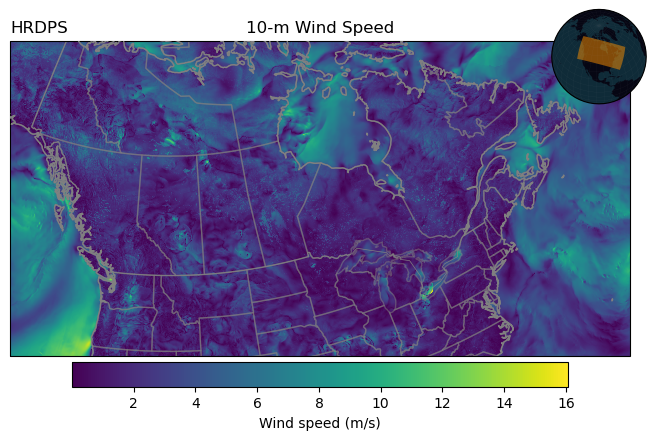

In [12]:
ax = (
    EasyMap("50m", crs=crs, figsize=8, linewidth=1, dark=True)
    .BORDERS()
    .STATES(alpha=0.5)
    .ax
)
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    np.hypot(ds.u10, ds.v10),  # Wind Speed
    transform=pc,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8, label="Wind speed (m/s)"
)

ax.set_title("10-m Wind Speed", loc="center")
ax.set_title(f"{ds.model.upper()}", loc="left")
ax.EasyMap.INSET_GLOBE()


----

### HRDPS North domain (experimental)

In [5]:
H = Herbie(
    recent.floor("12H"), #only run every 00 anc 12 UTC
    model="hrdps_north",
    fxx=0,
    product="north/grib2",
    variable="TMP",
    level="TGL_2",
)
ds = H.xarray()
ds


✅ Found ┊ model=hrdps_north ┊ product=north/grib2 ┊ 2023-Jul-01 00:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None
👨🏻‍🏭 Created directory: [/home/blaylock/data/hrdps_north/20230701]


/home/blaylock/GITHUB/Herbie/herbie/core.py:1060: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


<xarray.Dataset>
Dimensions:              (y: 825, x: 1465)
Coordinates:
    time                 datetime64[ns] 2023-07-01
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps_north
    product:                 north/grib2
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps_north/20230701/CMC_hrd...
    local_grib:              /home/blaylock/data/hrdps_north/20230701/CMC_hrd...
    searchString:            None

In [7]:
# This domain is run on a polar stereographic projection
ds.herbie.crs

<Derived Projected CRS: +proj=stere +ellps=sphere +a=6371229.0 +b=6371229. ...>
Name: unknown
Axis Info [cartesian]:
- E[south]: Easting (metre)
- N[south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

<GeoAxes: >

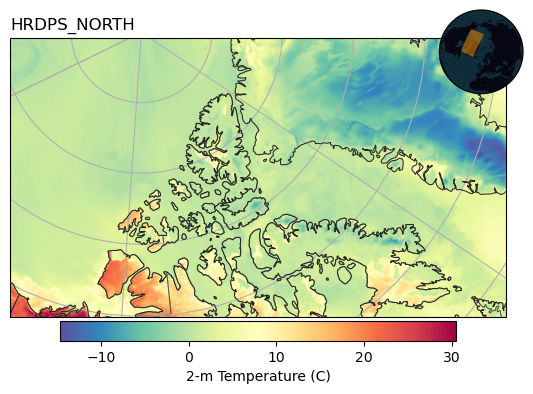

In [12]:
ax = EasyMap("50m", crs=ds.herbie.crs).BORDERS().STATES(alpha=0.5).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m - 273.15, transform=pc, cmap="Spectral_r"
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label="2-m Temperature (C)",
)
ax.set_title(f"{ds.model.upper()}", loc="left")
ax.gridlines()
ax.EasyMap.INSET_GLOBE()